In [68]:
#@formatter:off
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


%matplotlib inline
# sns.set_theme(style='whitegrid')
plt.style.use('default')
#@formatter:on

# Linear regression

[[0.88211282]
 [0.16192863]
 [1.83768605]
 [0.9550138 ]
 [0.70548737]
 [1.73297044]
 [1.24756918]
 [1.70835184]
 [1.00616718]
 [1.36089248]]
[[1.         0.88211282]
 [1.         0.16192863]
 [1.         1.83768605]
 [1.         0.9550138 ]
 [1.         0.70548737]
 [1.         1.73297044]
 [1.         1.24756918]
 [1.         1.70835184]
 [1.         1.00616718]
 [1.         1.36089248]]
[[7.33604128]
 [5.5458461 ]
 [9.34734852]
 [7.2423069 ]
 [3.78933196]
 [9.4173114 ]
 [8.40657508]
 [9.32788503]
 [9.02805516]
 [7.58573269]]


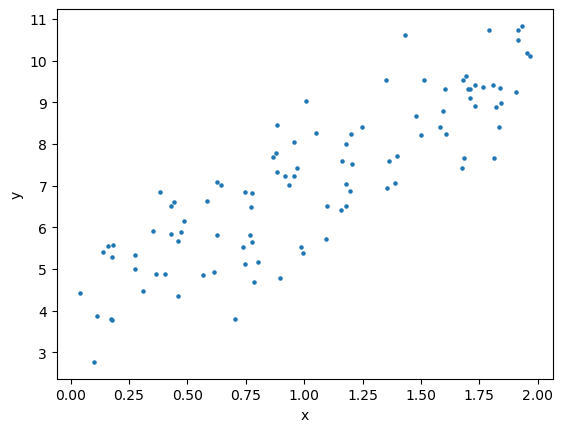

In [16]:
def default_scatterplot(X, y):
    plt.scatter(X, y, s=5)
    plt.xlabel('x')
    plt.ylabel('y')


m = 100
X = 2 * np.random.rand(m, 1)
print(X[:10])
X_b = np.c_[np.ones((m, 1)), X]
print(X_b[:10])
y = 4 + 3 * X + np.random.randn(m, 1)
print(y[:10])
default_scatterplot(X, y)

In [17]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(theta_best)

[[4.14575573]
 [2.88248057]]


[[1. 0.]
 [1. 2.]]
[[4.14575573]
 [9.91071688]]


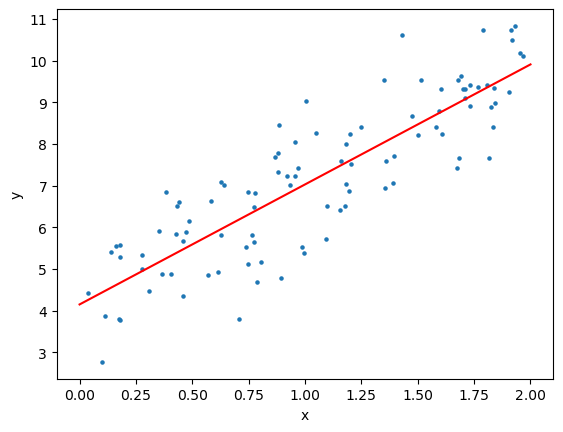

In [18]:
X_ext = np.array([[0], [2]])
X_ext_b = np.c_[np.ones((2, 1)), X_ext]
print(X_ext_b)
y_ext = X_ext_b @ theta_best
print(y_ext)

default_scatterplot(X, y)
plt.plot(X_ext, y_ext, c='r')

In [19]:
y_predict = X_b @ theta_best
rmse = np.sqrt(1 / m * np.sum((y_predict - y) ** 2))
print(rmse)

0.9527724697426682


## Scikit Linear regression

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
skl_ext_predict = lin_reg.predict(X_ext)
print(skl_ext_predict)
skl_predict = lin_reg.predict(X)
lin_mse = mean_squared_error(skl_predict, y)
print(np.sqrt(lin_mse))

[4.14575573] [[2.88248057]]
[[4.14575573]
 [9.91071688]]
0.9527724697426682


# Gradient descent

### Pocket

In [21]:
eta = 0.1  # learning speed
n_iterations = 1000
theta = np.random.randn(2, 1)
for n_iterations in range(n_iterations):
    gradient = 2 / m * (X_b.T @ (X_b @ theta - y))
    theta = theta - eta * gradient
print(theta)

[[4.14575573]
 [2.88248057]]


### Pocket + tolerant

In [22]:
epsilon = np.array([[0.0001], [0.0001]])
gradient = np.array([[1], [1]])
theta = np.random.randn(2, 1)
n_iterations = 0

while np.any(np.abs(gradient) > epsilon):
    gradient = 2 / m * (X_b.T @ (X_b @ theta - y))
    theta = theta - eta * gradient
    n_iterations += 1

print(theta)
print(n_iterations)

[[4.14541265]
 [2.8827627 ]]
288


### Stochastic + simulated annealing

In [23]:
def learning_schedule(t, t0=5, t1=50):
    return t0 / (t + t1)


n_epochs = 50
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi, yi = X_b[[random_index]], y[[random_index]]
        gradient = 2 * (xi.T @ (xi @ theta - yi))
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradient
print(theta)

[[4.15099533]
 [2.9226729 ]]


### Mini-pocket

In [24]:
eta = 0.1
sample_size = 10
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(int(m / sample_size)):
        random_indices = np.random.randint(m, size=sample_size)
        xs, ys = X_b[random_indices], y[random_indices]
        gradient = 2 / sample_size * (xs.T @ (xs @ theta - ys))
        theta = theta - eta * gradient
print(theta)

[[4.027675  ]
 [3.00568077]]


## Scikit Gradient descent

In [25]:
sgd_reg = SGDRegressor(eta0=0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[4.14851657] [2.90162075]


# Polynomial regression

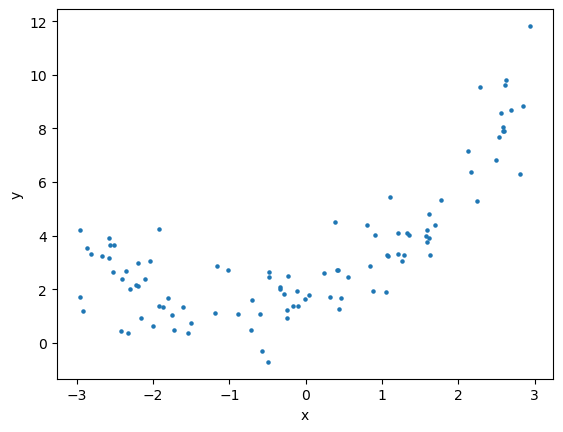

In [53]:
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
default_scatterplot(X, y)

In [54]:
X_poly = poly_features.fit_transform(X)
print(X[:10])
print(X_poly[:10])

[[-2.00241753]
 [-0.11696212]
 [-2.86761752]
 [-1.92660265]
 [-1.92116187]
 [-1.72365374]
 [ 2.58959694]
 [ 2.24429287]
 [-0.70210331]
 [-2.50910642]]
[[-2.00241753  4.00967597]
 [-0.11696212  0.01368014]
 [-2.86761752  8.22323022]
 [-1.92660265  3.71179779]
 [-1.92116187  3.69086294]
 [-1.72365374  2.97098222]
 [ 2.58959694  6.70601234]
 [ 2.24429287  5.03685049]
 [-0.70210331  0.49294906]
 [-2.50910642  6.29561505]]


[1.70863098] [[1.05078532 0.5465589 ]]


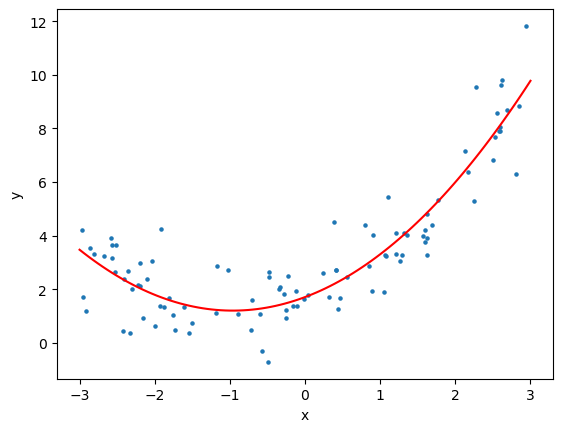

In [55]:
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
X_plot_poly = poly_features.fit_transform(X_plot)
y_plot_pred = lin_reg.predict(X_plot_poly)

default_scatterplot(X, y)
plt.plot(X_plot, y_plot_pred, c='r')

# Fitting

### Overfitting (RMSE is high)

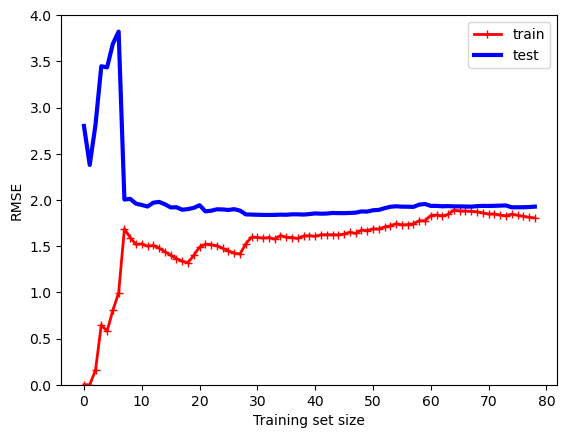

In [78]:
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(np.sqrt(train_errors), "r-+", lw=2, label='train')
    plt.plot(np.sqrt(test_errors), "b-", lw=3, label='test')
    plt.legend()
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.ylim([0, 4])

plot_learning_curves(lin_reg, X, y)

### Underfitting (RMSE difference is big)

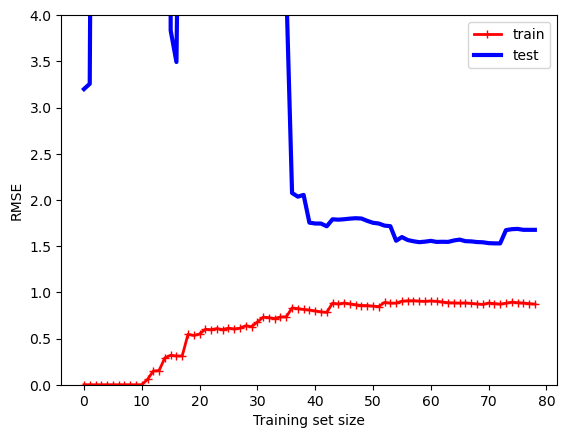

In [79]:
pol_reg = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(pol_reg, X, y)